- - - -
# LED Electrical Characteristics Dependence on LED Color

- - - -

Troy Messina @ Berea College

- - - -

**1) Load Current-Voltage (I-V) Data**    
**2) Plot Data**  
**3) Curve Fitting**  

- - - -

This is a smattering of scripts to work with data collected from ELVISmx and myDAQ. We previously analyzed an LED to understand curve fitting and finding the forward voltage that corresponds to turning on. Now we will look at how that forward voltage depends on the color of the LED.

In [4]:
# import modules
import pandas as pd
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

We need to be a bit more careful about loading data into Jupyter because we need to load four different data sets for the four LEDS red, yellow, green, and blue.

In [5]:
#We'll use pandas to load an Excel file. Pandas is very smart at this.
blue_df = pd.read_excel('/home/nbuser/library/BlueLEDData-100Ohm.xlsx', 'BlueLEDData-100Ohm', index_col=None, na_values=['NA'])
green_df = pd.read_excel('/home/nbuser/library/GreenLEDData-100Ohm.xlsx', 'GreenLEDData-100Ohm', index_col=None, na_values=['NA'])
yellow_df = pd.read_excel('/home/nbuser/library/YellowLEDData-100Ohm.xlsx', 'YellowLEDData-100Ohm', index_col=None, na_values=['NA'])
red_df = pd.read_excel('/home/nbuser/library/RedLEDData-100Ohm.xlsx', 'RedLEDData-100Ohm', index_col=None, na_values=['NA'])
#print(df) #Print what gets read. We'll see that the columns are labeled, and we can call by these labels.
#df['Ch0'].plot() #Plot the data labeled Ch0. This is our LED Voltage.
#df['Ch1'].plot() #Add to the plot the data labeled Ch1. This is our input Voltage.
#plt.show()

Let's create a current column in each dataframe. We'll then copy the input voltage, LED voltage, and current into 1D numpy arrays. Finally, we plot it.

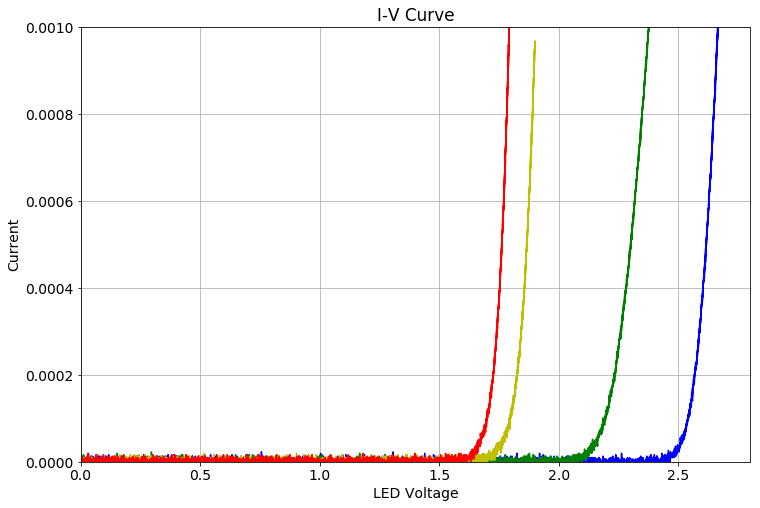

In [6]:
#current = (df.Ch1-df.Ch0)/100
blue_df['current'] = (blue_df['Ch1']-blue_df['Ch0'])/100 #Calculate the current as derived above and put it in the dataframe created by Pandas.
green_df['current'] = (green_df['Ch1']-green_df['Ch0'])/100
yellow_df['current'] = (yellow_df['Ch1']-yellow_df['Ch0'])/100
red_df['current'] = (red_df['Ch1']-red_df['Ch0'])/100

bluedatamatrix = blue_df.values
LEDVoltage_blue = np.array(bluedatamatrix[:,1], dtype=np.float64)
InputVoltage_blue = np.array(bluedatamatrix[:,3], dtype=np.float64)
LEDCurrent_blue = np.array(bluedatamatrix[:,4], dtype=np.float64)

greendatamatrix = green_df.values
LEDVoltage_green = np.array(greendatamatrix[:,1], dtype=np.float64)
InputVoltage_green = np.array(greendatamatrix[:,3], dtype=np.float64)
LEDCurrent_green = np.array(greendatamatrix[:,4], dtype=np.float64)

yellowdatamatrix = yellow_df.values
LEDVoltage_yellow = np.array(yellowdatamatrix[:,1], dtype=np.float64)
InputVoltage_yellow = np.array(yellowdatamatrix[:,3], dtype=np.float64)
LEDCurrent_yellow = np.array(yellowdatamatrix[:,4], dtype=np.float64)

reddatamatrix = red_df.values
LEDVoltage_red = np.array(reddatamatrix[:,1], dtype=np.float64)
InputVoltage_red = np.array(reddatamatrix[:,3], dtype=np.float64)
LEDCurrent_red = np.array(reddatamatrix[:,4], dtype=np.float64)

plt.plot(LEDVoltage_blue, LEDCurrent_blue, 'b')
plt.plot(LEDVoltage_green, LEDCurrent_green, 'g')
plt.plot(LEDVoltage_yellow, LEDCurrent_yellow, 'y')
plt.plot(LEDVoltage_red, LEDCurrent_red, 'r')
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.title('I-V Curve')
plt.axis([0, 2.8, 0, 0.001])
plt.grid(True)
plt.show()

values of the fitting parameters
[6.26241819 4.97371523]
[[0.16051439 0.0066384 ]
 [0.0066384  0.0002747 ]]


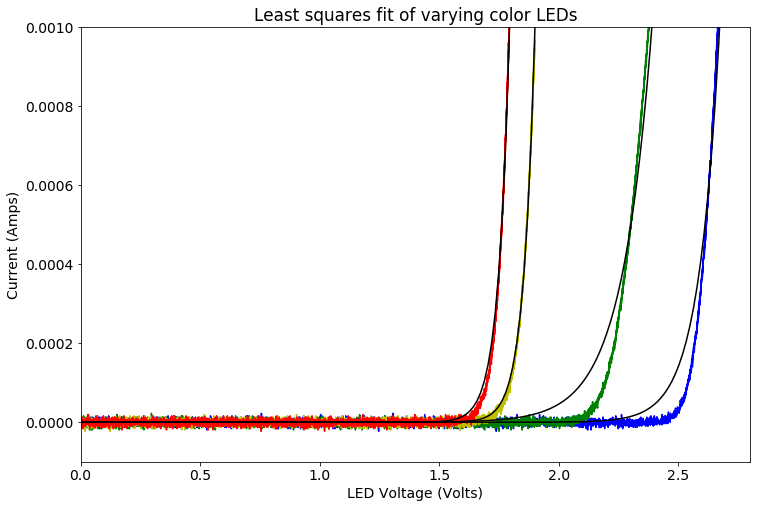

In [7]:
# non-linear least squares
#constants
kB = 1.381e-23
q = 1.602e-19
T = 295
mult = 1e-12

# curve_fit optization
def f(x, a, b):
    return a*mult*(exp(x*q/kB/T/b)-1)

a = 5 #initial guess
b = 5 #initial guess
xx = linspace(0, 3, 200)
blue_params, blue_pcov = curve_fit(f, LEDVoltage_blue, LEDCurrent_blue, (a,b))
green_params, green_pcov = curve_fit(f, LEDVoltage_green, LEDCurrent_green, (a,b))
yellow_params, yellow_pcov = curve_fit(f, LEDVoltage_yellow, LEDCurrent_yellow, (a,b))
red_params, red_pcov = curve_fit(f, LEDVoltage_red, LEDCurrent_red, (a,b))

print('values of the fitting parameters')
print(green_params)
print(green_pcov)

plt.plot(LEDVoltage_blue, LEDCurrent_blue, 'b')
plt.plot(LEDVoltage_green, LEDCurrent_green, 'g')
plt.plot(LEDVoltage_yellow, LEDCurrent_yellow, 'y')
plt.plot(LEDVoltage_red, LEDCurrent_red, 'r')
plt.plot(xx, f(xx, *blue_params), 'k')
plt.plot(xx, f(xx, *green_params), 'k')
plt.plot(xx, f(xx, *yellow_params), 'k')
plt.plot(xx, f(xx, *red_params), 'k')
plt.title(r'Least squares fit of varying color LEDs')
plt.xlim([0,2.8])
plt.ylim([-0.0001,0.0010])
plt.xlabel('LED Voltage (Volts)')
plt.ylabel('Current (Amps)')
plt.show()

The fits for green and blue are pretty bad! Let's look at another method. We can fit the exponential rise to a line and see where it projects back onto the x-axis. To do this, we need to figure out what range of LEDVoltage corresponds to the rise. Let's do this one by one.

The blue curve appears to turn up after about 2.6 Volts.

The green curve appears to turn up after about 2.2 Volts.

The yellow curve appears to turn up after about 1.7 Volts.

The red curve appears to turn up after about 1.6 Volts.

We will need to adjust these to get the best fit. This can be accomplished by trying to minimize the covariant matrix diagonal elements. We'll do this by eye.

values of the fitting parameters
[ 0.01298721 -0.03354981] [[ 4.03607062e-09 -1.08322258e-08]
 [-1.08322258e-08  2.90799497e-08]]
[ 0.00728342 -0.01625288] [[ 8.61057100e-10 -2.04418858e-09]
 [-2.04418858e-09  4.85688747e-09]]
[ 0.01235911 -0.02255318] [[ 8.40410682e-09 -1.57709786e-08]
 [-1.57709786e-08  2.95971944e-08]]
[ 0.01943409 -0.03377351] [[ 1.96816388e-08 -3.52322706e-08]
 [-3.52322706e-08  6.30778495e-08]]


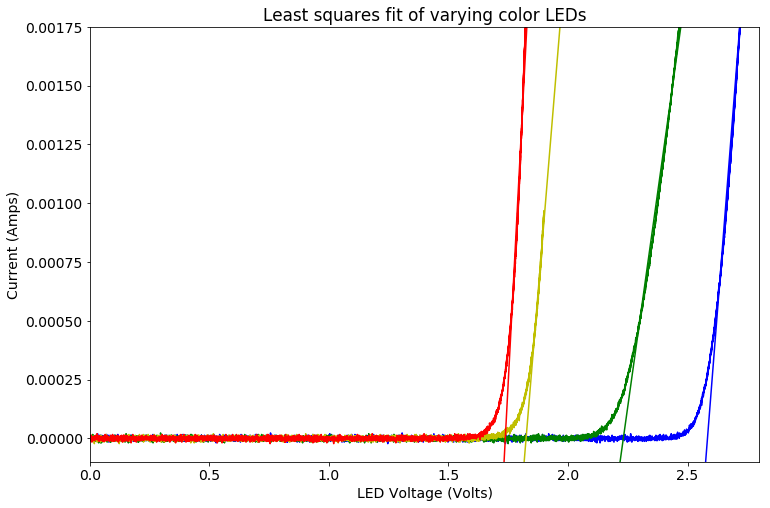

In [13]:
# curve_fit optization
def f_line(x, a, b):
    return a*x + b

a = 0.01
b = -1
xtemp = LEDVoltage_blue[LEDVoltage_blue>2.6]
ytemp = LEDCurrent_blue[LEDVoltage_blue>2.6]
blue_params, blue_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

xtemp = LEDVoltage_green[LEDVoltage_green>2.25]
ytemp = LEDCurrent_green[LEDVoltage_green>2.25]
green_params, green_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

xtemp = LEDVoltage_yellow[LEDVoltage_yellow>1.85]
ytemp = LEDCurrent_yellow[LEDVoltage_yellow>1.85]
yellow_params, yellow_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

xtemp = LEDVoltage_red[LEDVoltage_red>1.75]
ytemp = LEDCurrent_red[LEDVoltage_red>1.75]
red_params, red_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

print('values of the fitting parameters')
print(blue_params, blue_pcov)
print(green_params, green_pcov)
print(yellow_params, yellow_pcov)
print(red_params, red_pcov)

plt.plot(LEDVoltage_blue, LEDCurrent_blue, 'b')
plt.plot(LEDVoltage_green, LEDCurrent_green, 'g')
plt.plot(LEDVoltage_yellow, LEDCurrent_yellow, 'y')
plt.plot(LEDVoltage_red, LEDCurrent_red, 'r')
plt.plot(xx, f_line(xx, *blue_params), 'b')
plt.plot(xx, f_line(xx, *green_params), 'g')
plt.plot(xx, f_line(xx, *yellow_params), 'y')
plt.plot(xx, f_line(xx, *red_params), 'r')
plt.title(r'Least squares fit of varying color LEDs')
plt.xlim([0,2.8])
plt.ylim([-0.0001,0.00175])
plt.xlabel('LED Voltage (Volts)')
plt.ylabel('Current (Amps)')
plt.show()

In [18]:
blue_V_on = -blue_params[1]/blue_params[0]
green_V_on = -green_params[1]/green_params[0]
yellow_V_on = -yellow_params[1]/yellow_params[0]
red_V_on = -red_params[1]/red_params[0]
print(blue_V_on)
print(green_V_on)
print(yellow_V_on)
print(red_V_on)

2.58329704909455
2.2314901984030473
1.8248223803693433
1.7378484150137712


In [29]:
h = 6.626e-34 #Planck's constant
c = 3e8 #speed of light
red_wavelength = h*c/q/red_V_on
yellow_wavelength = h*c/q/yellow_V_on
green_wavelength = h*c/q/green_V_on
blue_wavelength = h*c/q/blue_V_on

print('blue LED wavelength =', "{0:.0f}".format(blue_wavelength/1e-9), ' nm')
print('green LED wavelength = ', "{0:.0f}".format(green_wavelength/1e-9), ' nm')
print('yellow LED wavelength = ', "{0:.0f}".format(yellow_wavelength/1e-9), ' nm')
print('red LED wavelength = ', "{0:.0f}".format(red_wavelength/1e-9), ' nm')

blue LED wavelength = 480  nm
green LED wavelength =  556  nm
yellow LED wavelength =  680  nm
red LED wavelength =  714  nm
